## Project : RTA Severity Classification

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.max_columns',32)
# pd.set_option('display.max_rows',None)

### Read dataset

In [3]:
dataset_loc = 'Datasets\RTA Dataset.csv'

In [4]:
rta_data = pd.read_csv(dataset_loc)

In [5]:
rta_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### EDA :-

In [6]:
rta_data.shape

(12316, 32)

In [7]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
rta_data.rename(columns=col_map, inplace=True)

In [9]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [10]:
rta_data['time'] = pd.to_datetime(rta_data['time'])

In [11]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [12]:
rta_data.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [13]:
rta_data.describe(include='O').T

,count,unique,top,freq
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883
vehicle_defect,7889,3,No defect,7777


In [14]:
## Check the duplicate & unique counts
print("Total no of duplicate {0}".format(rta_data.duplicated().sum()))
print("No of unique item {0}".format(rta_data.nunique))


Total no of duplicate 0
No of unique item <bound method DataFrame.nunique of                      time day_of_week driver_age driver_sex  \
0     2022-08-08 17:02:00      Monday      18-30       Male   
1     2022-08-08 17:02:00      Monday      31-50       Male   
2     2022-08-08 17:02:00      Monday      18-30       Male   
3     2022-08-08 01:06:00      Sunday      18-30       Male   
4     2022-08-08 01:06:00      Sunday      18-30       Male   
...                   ...         ...        ...        ...   
12311 2022-08-08 16:15:00   Wednesday      31-50       Male   
12312 2022-08-08 18:00:00      Sunday    Unknown       Male   
12313 2022-08-08 13:55:00      Sunday    Over 51       Male   
12314 2022-08-08 13:55:00      Sunday      18-30     Female   
12315 2022-08-08 13:55:00      Sunday      18-30       Male   

        educational_level vehicle_driver_relation driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high sch

In [15]:
## check the null count
rta_data.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [16]:
# extracting hour and minute from timestamp
rta_data['hour'] = rta_data['time'].dt.hour
rta_data['minute'] = rta_data['time'].dt.minute
rta_data.drop('time', axis=1, inplace=True)

In [17]:
rta_data.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


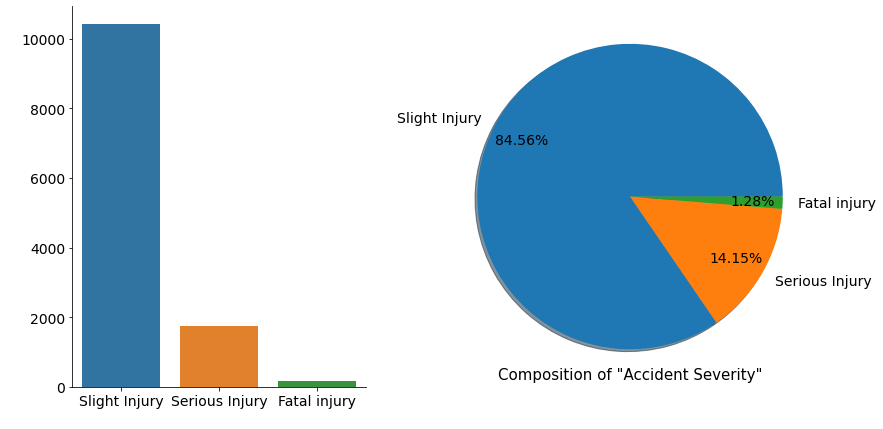

In [18]:
## check the Target value
plt.figure(figsize=(20,7))

## barplot
ax1 = plt.subplot(1,3,1)
cp = sns.countplot(x=rta_data["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,3,2)
plt.pie(rta_data["accident_severity"].value_counts(),
        labels=list(rta_data["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)



plt.show()

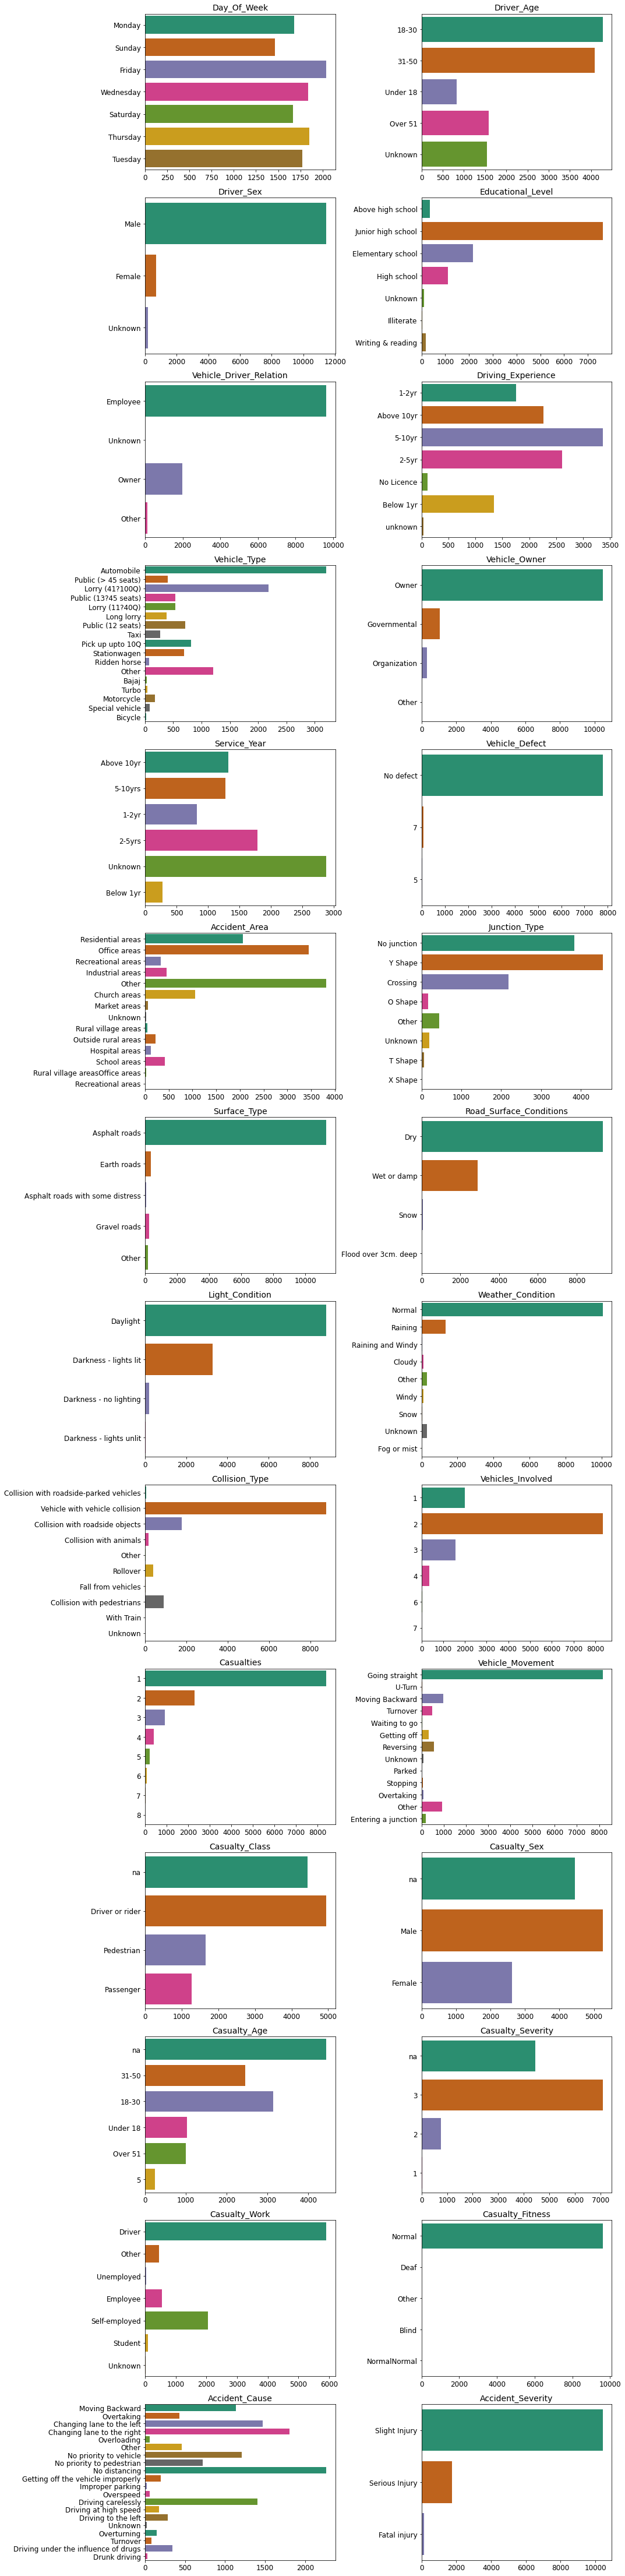

In [19]:
## Plot the countplot for categorical features to understand 
plt.figure(figsize=(15,70))
plotnumber = 1

for col in rta_data.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= rta_data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=rta_data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

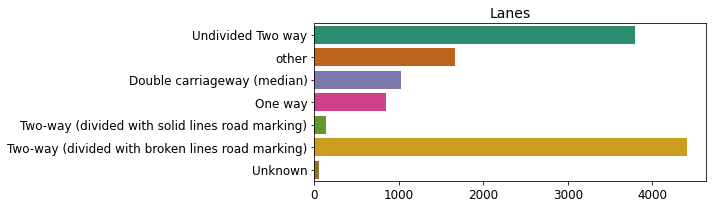

In [20]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

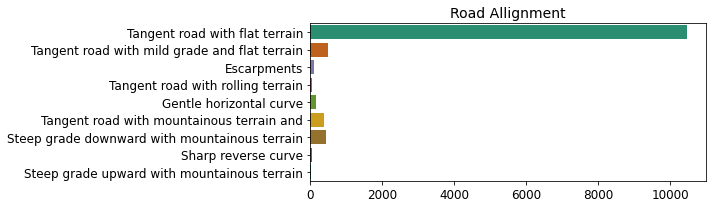

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_26108\3423941868.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


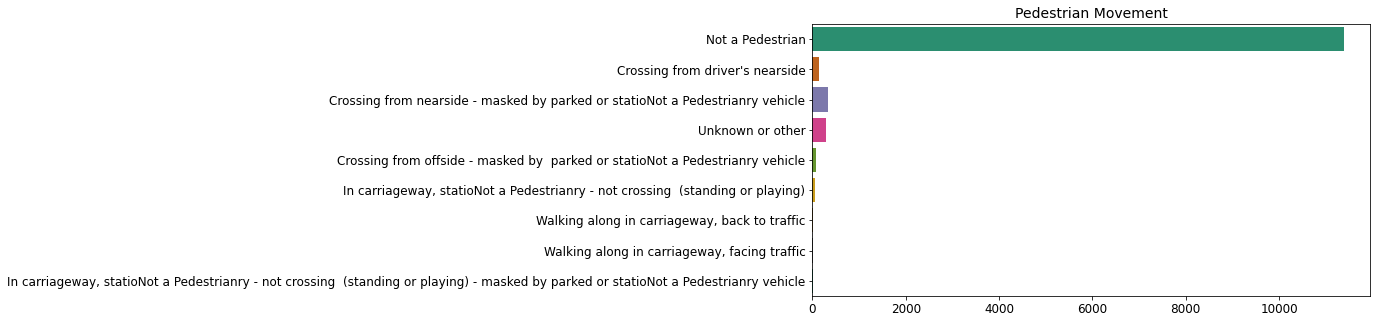

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

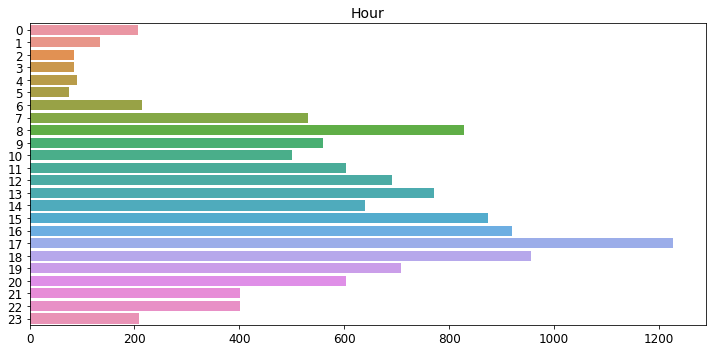

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

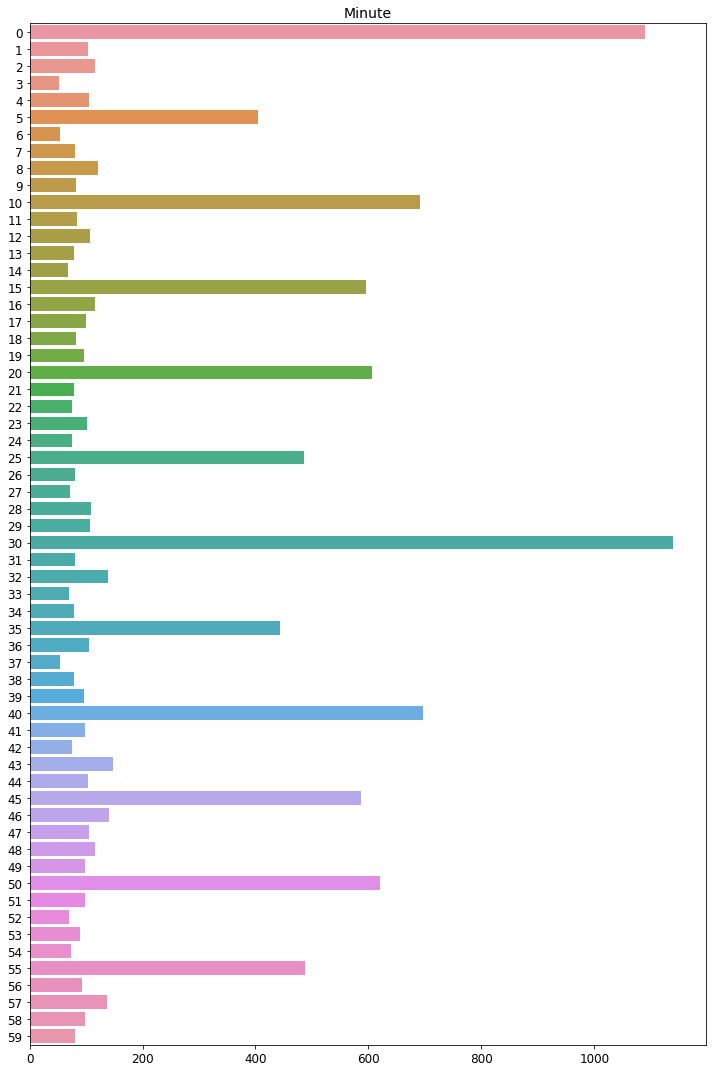

In [24]:
plt.figure(figsize=(10,15))
sns.countplot(data=rta_data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Observations:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

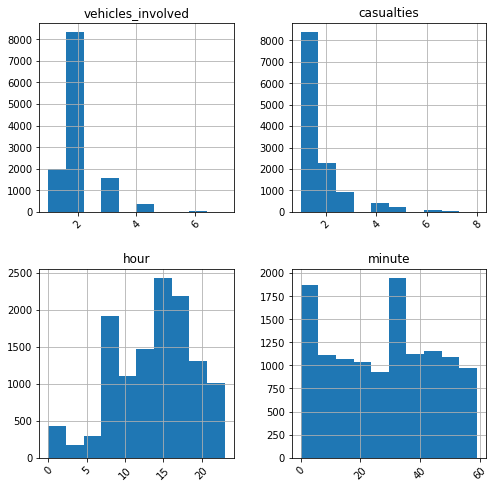

In [25]:
### Plot Histogram for Numeric Features
rta_data.hist(figsize=(8,8),xrot=45)
plt.show()

#### Observations:
1. As we got know maximum accident happend for 'Male' driver those age is between 18-30.
2. Max accident happened in Friday at 15:30 time because probability of drivers are employees and as consider its weekend starts people might be hurry for returning from office. 

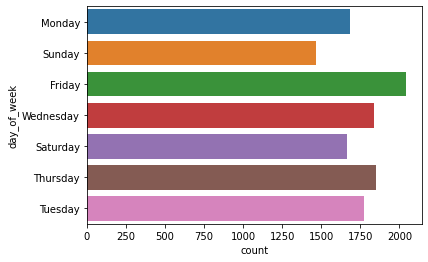

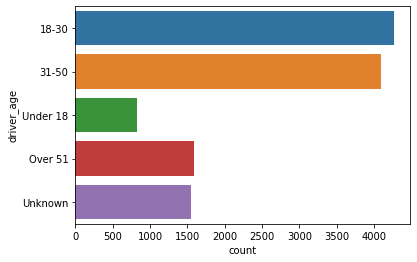

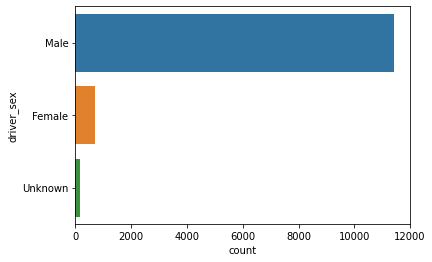

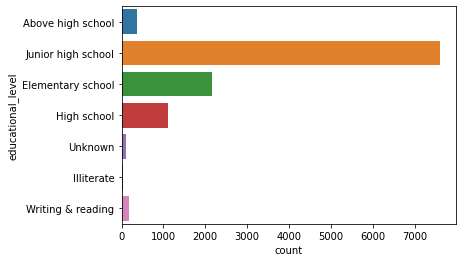

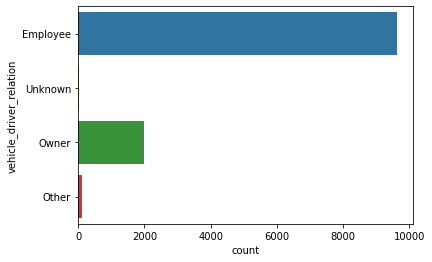

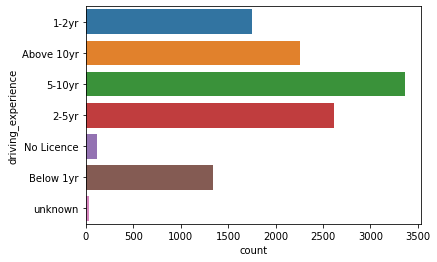

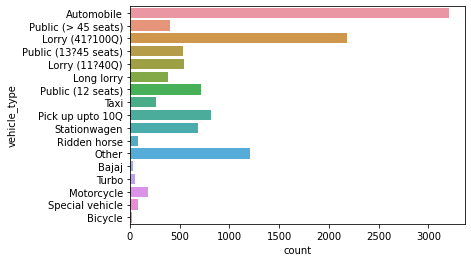

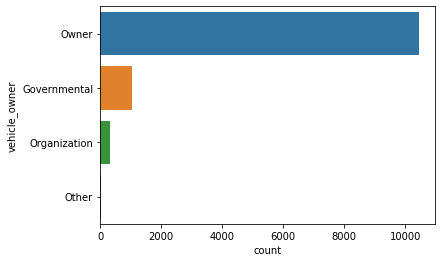

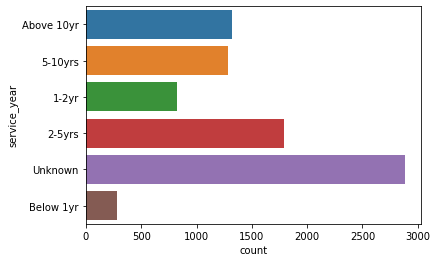

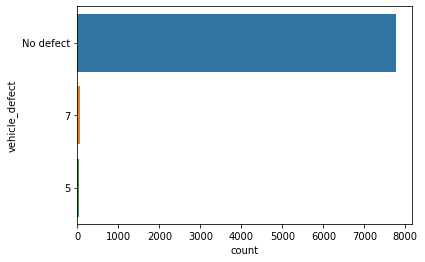

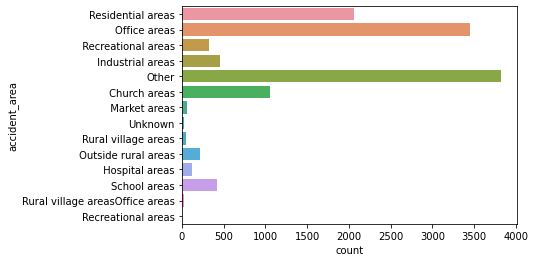

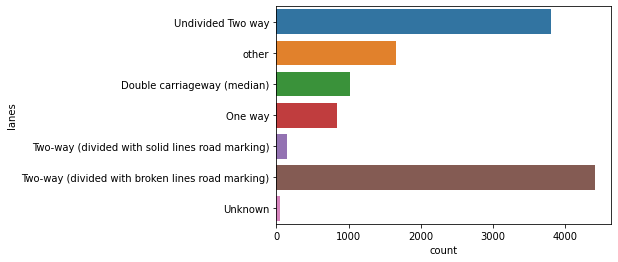

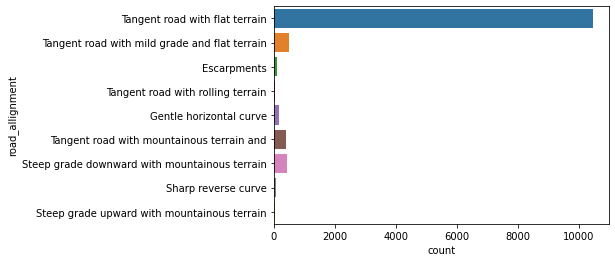

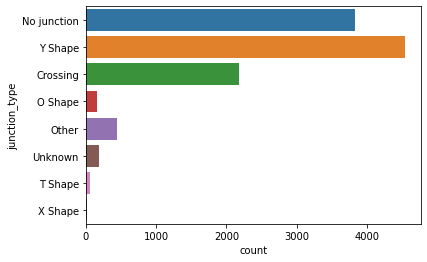

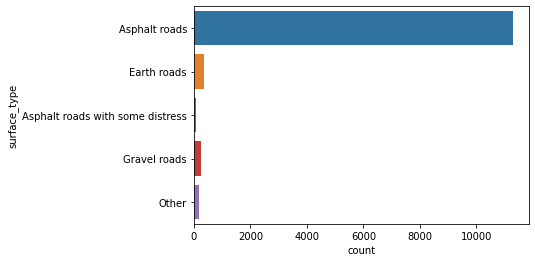

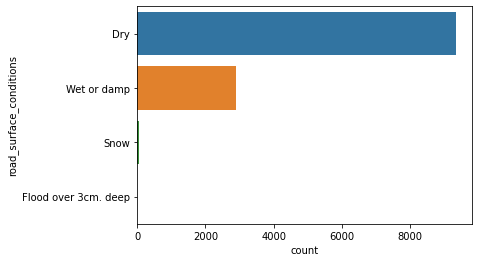

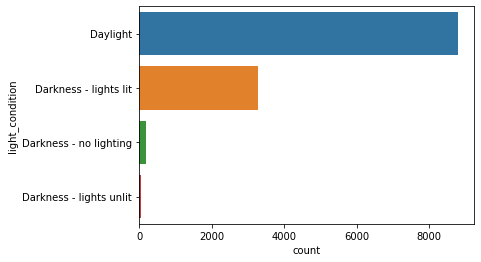

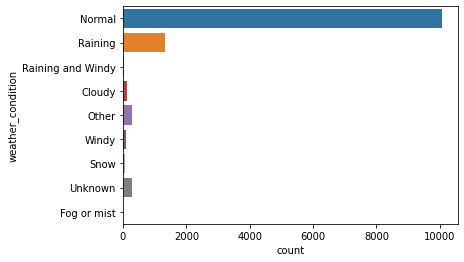

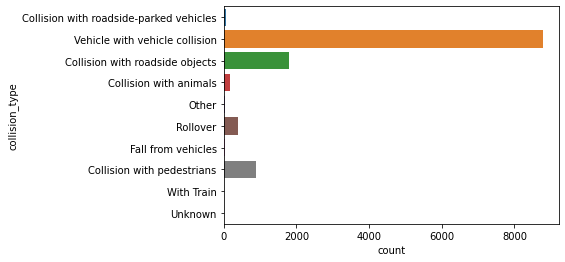

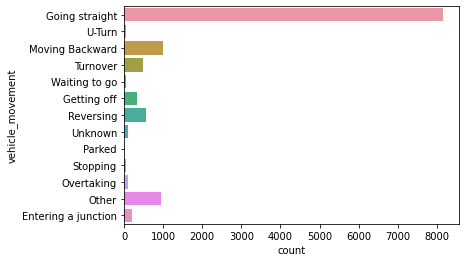

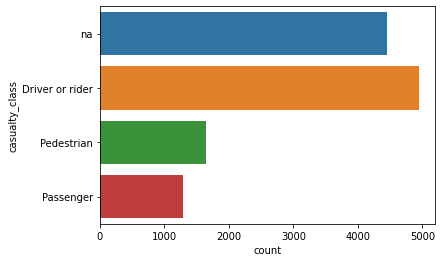

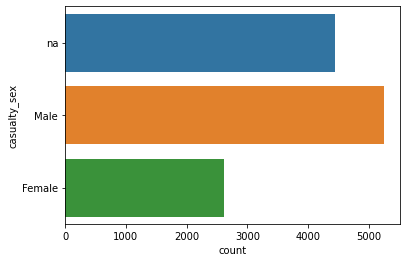

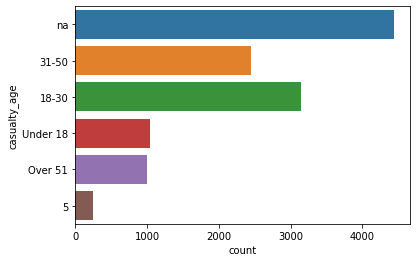

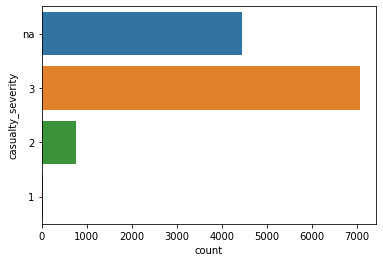

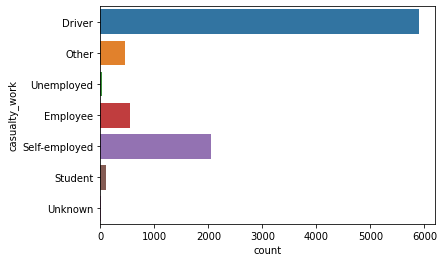

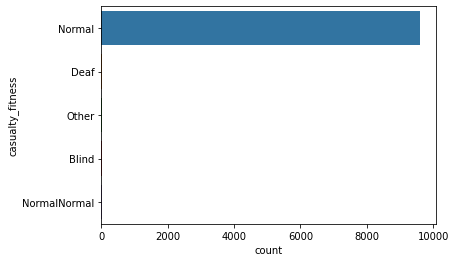

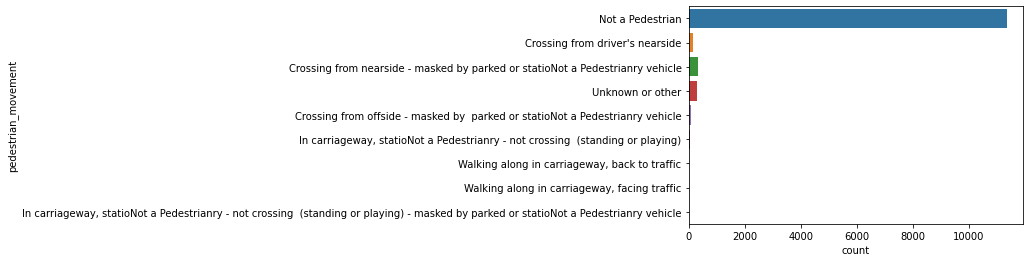

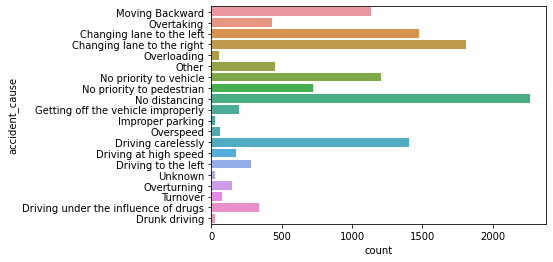

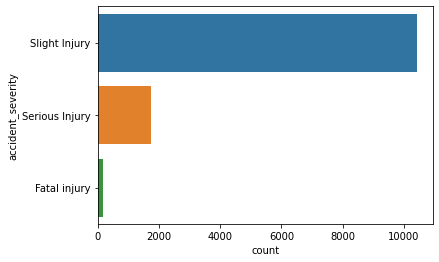

In [26]:
### Plot the Categorical distributions
for col in rta_data.select_dtypes(include='object'):
  if rta_data[col].nunique() <= 22:
    sns.countplot(y=col,data=rta_data)
    plt.show()

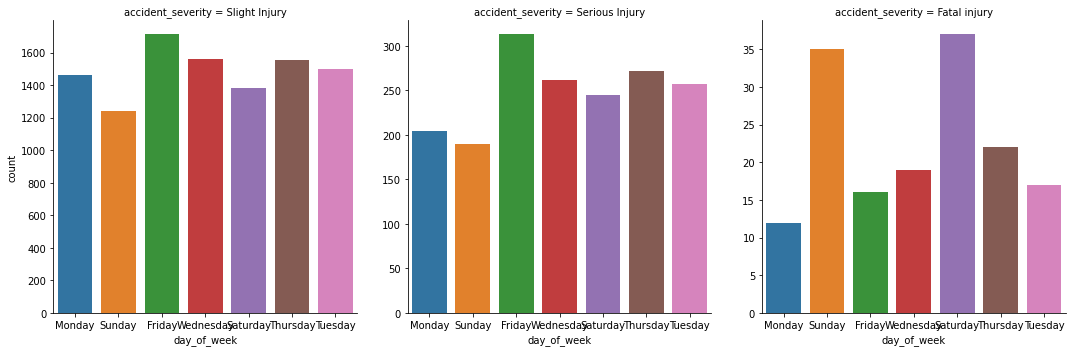

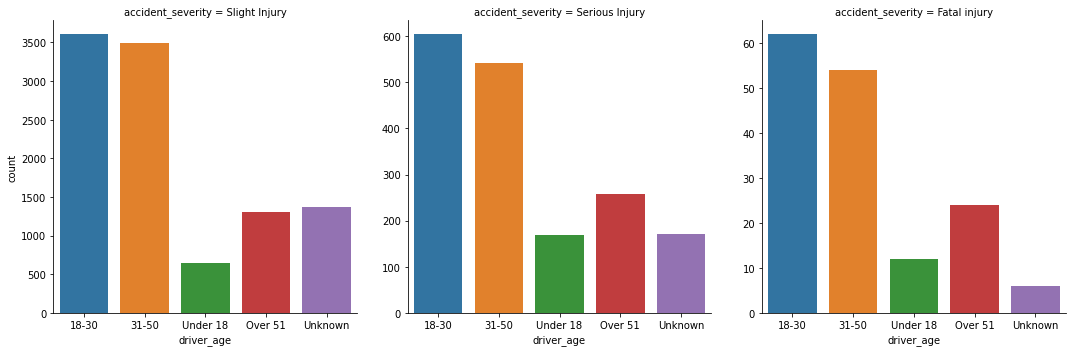

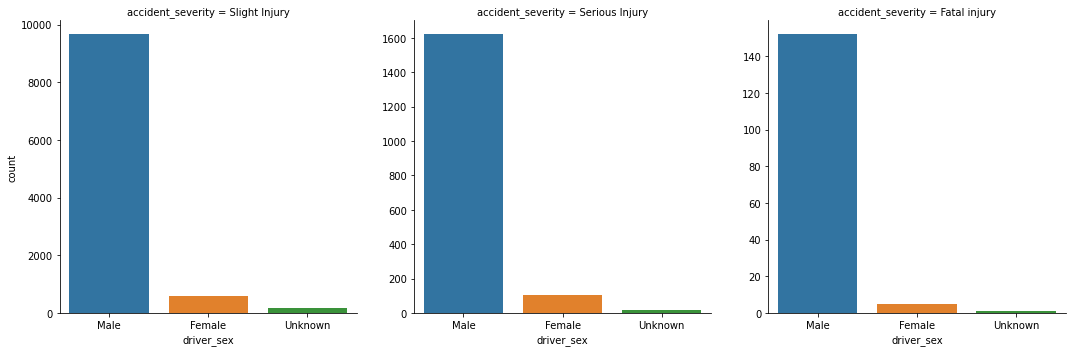

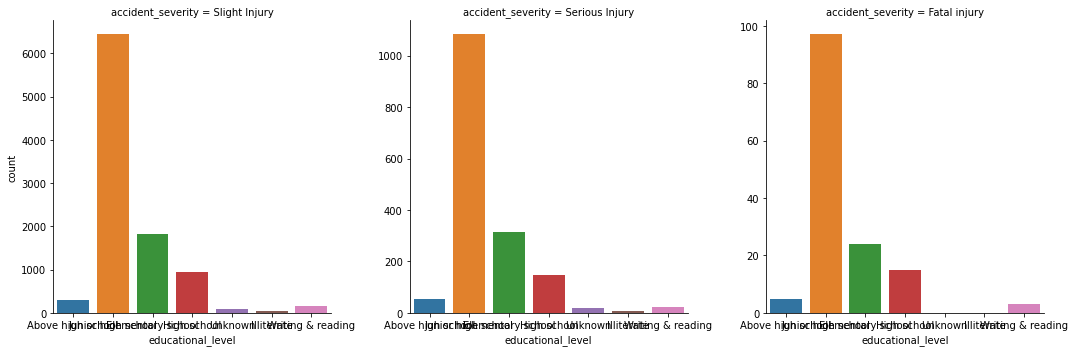

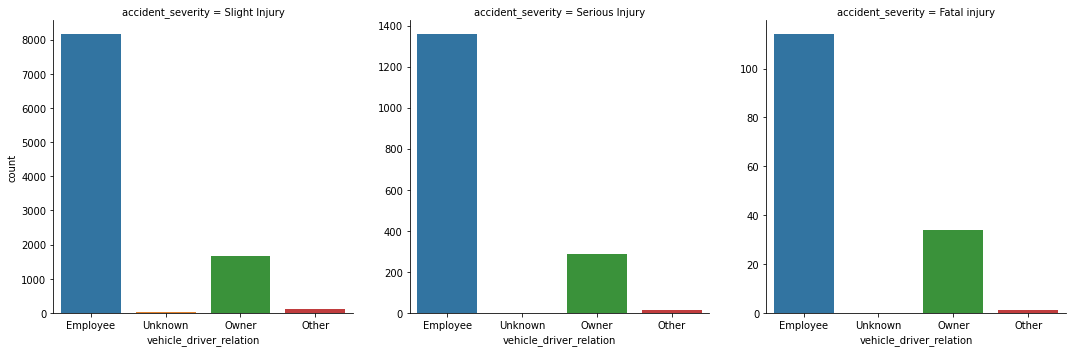

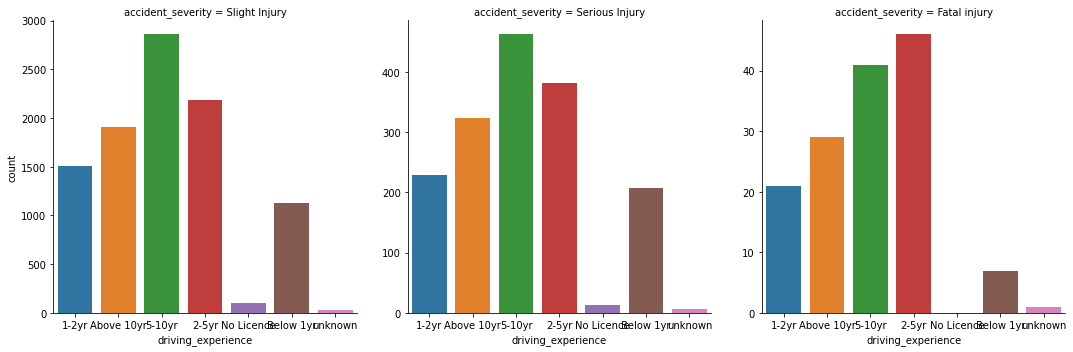

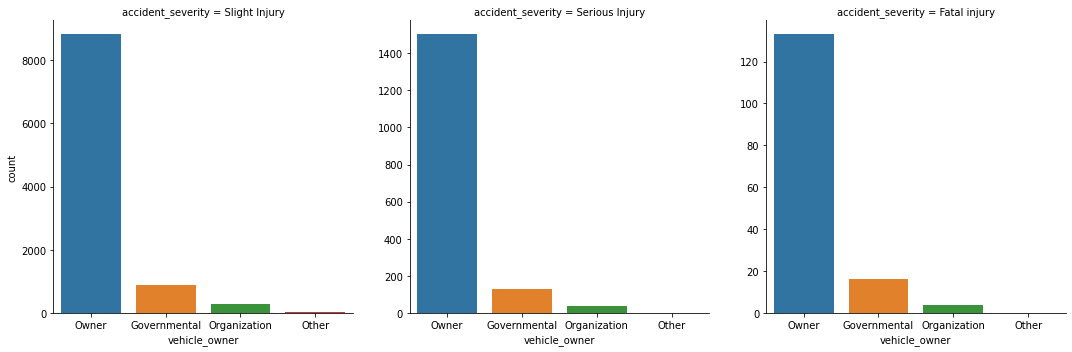

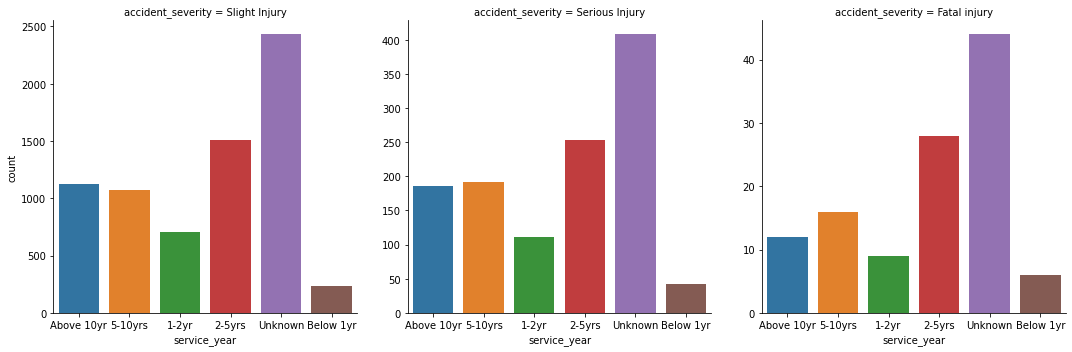

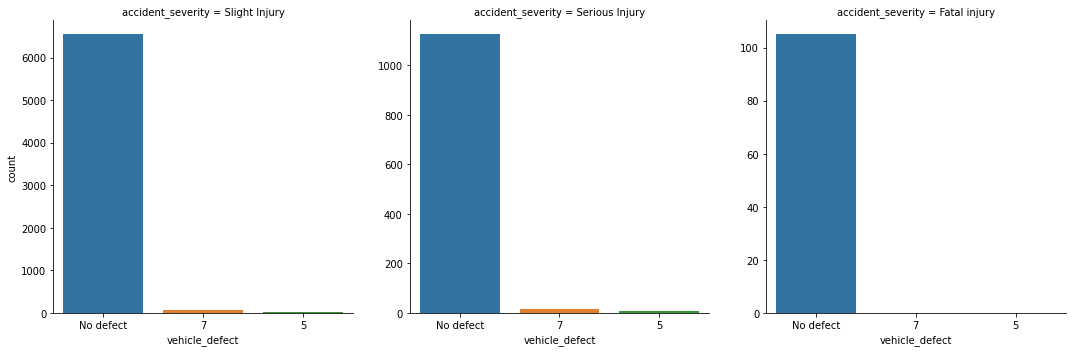

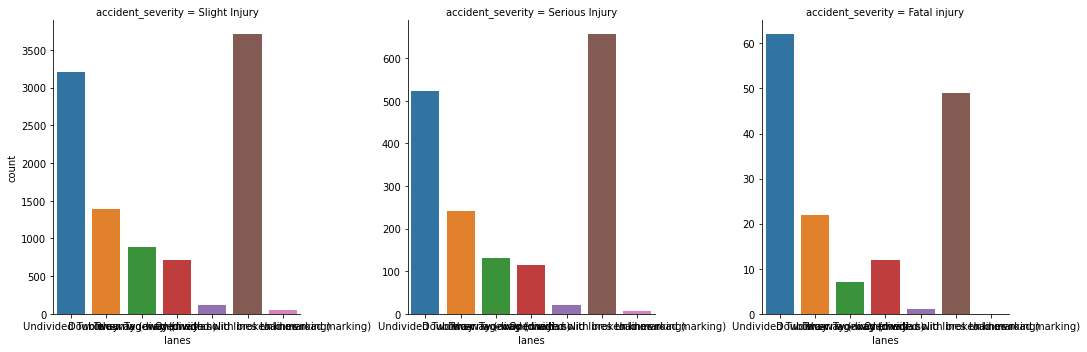

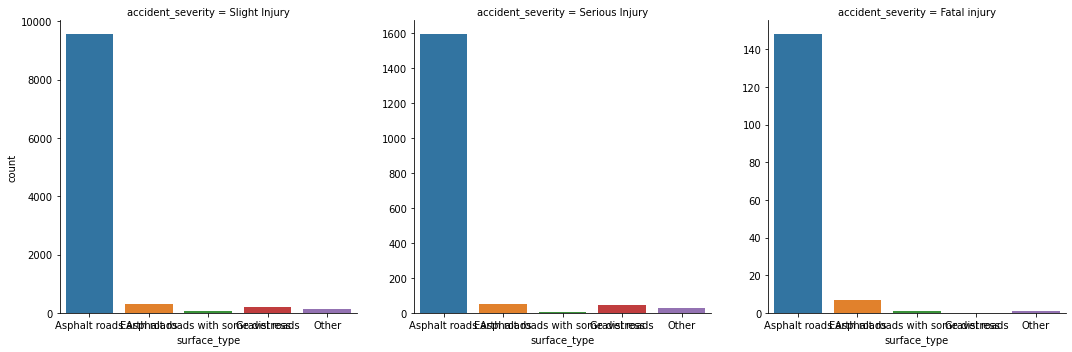

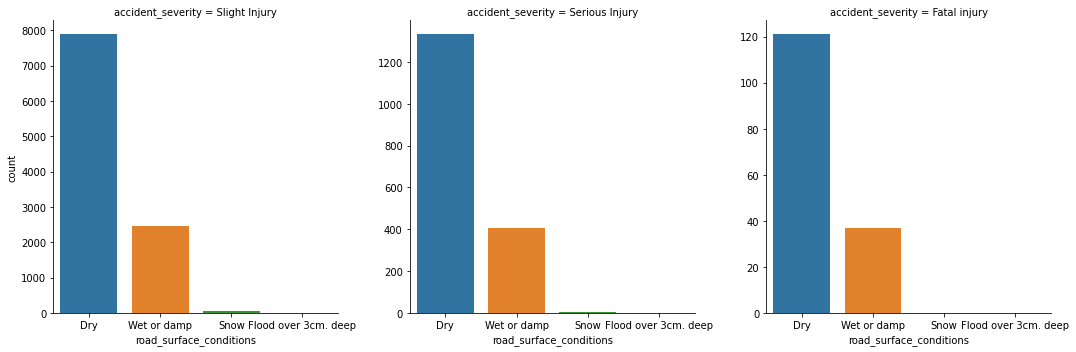

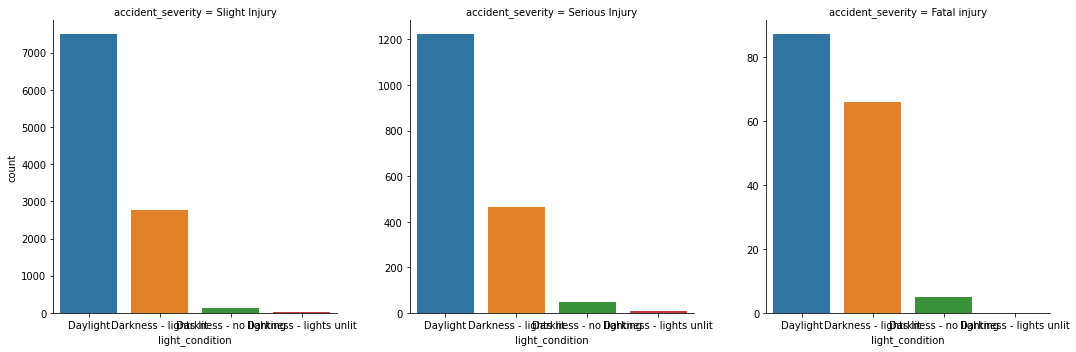

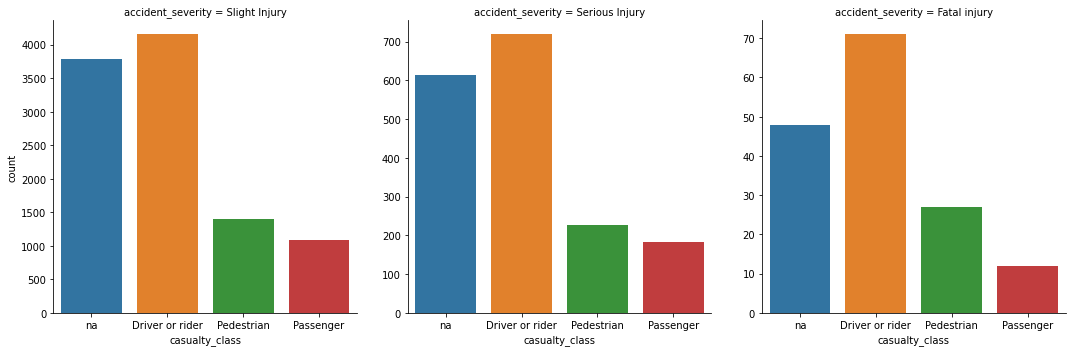

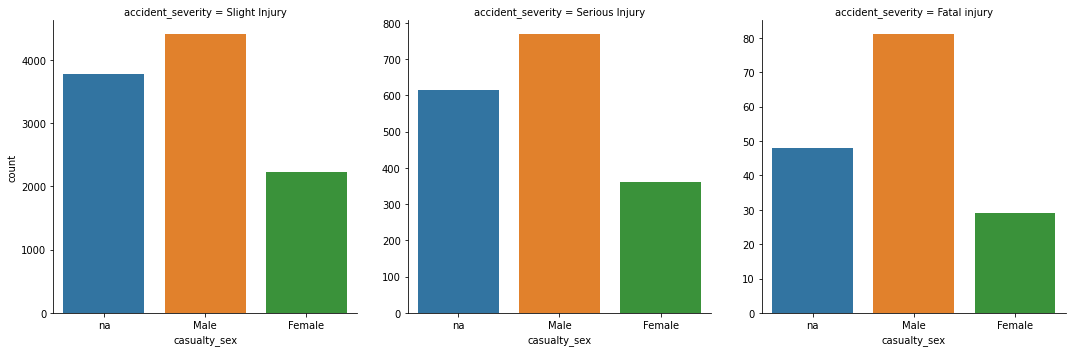

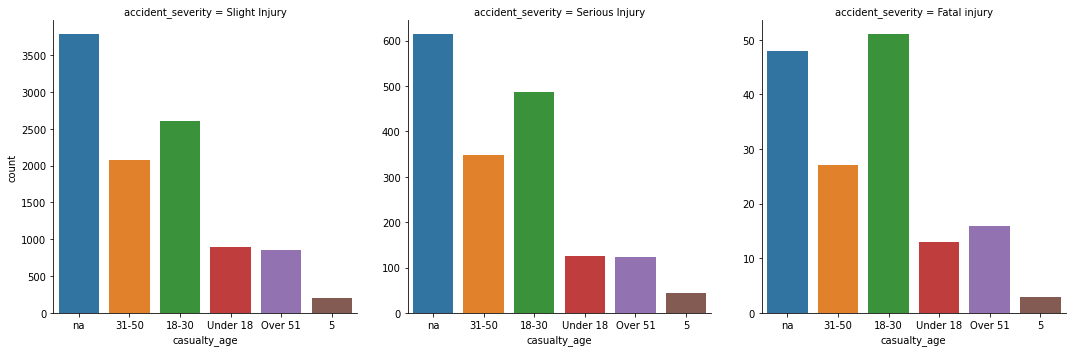

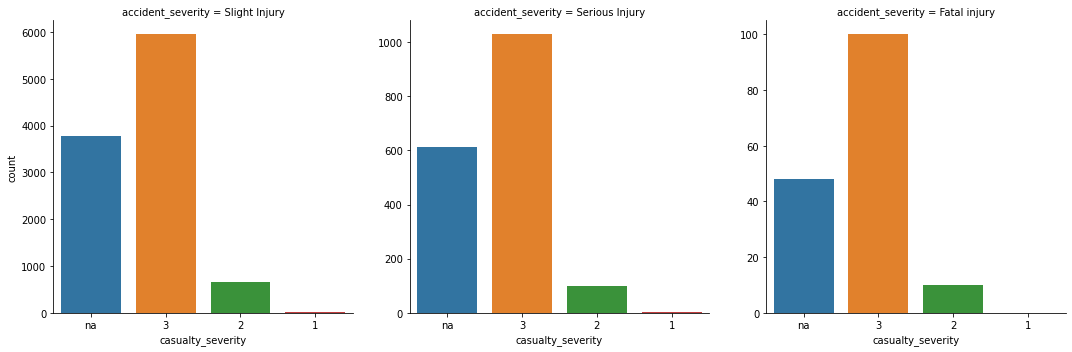

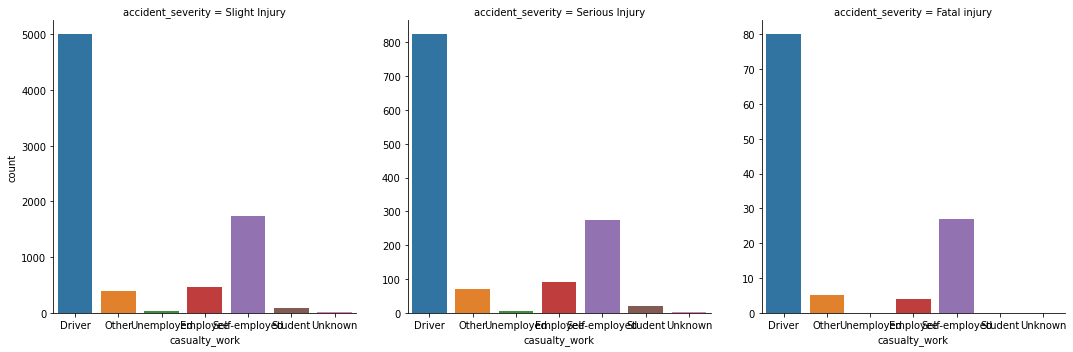

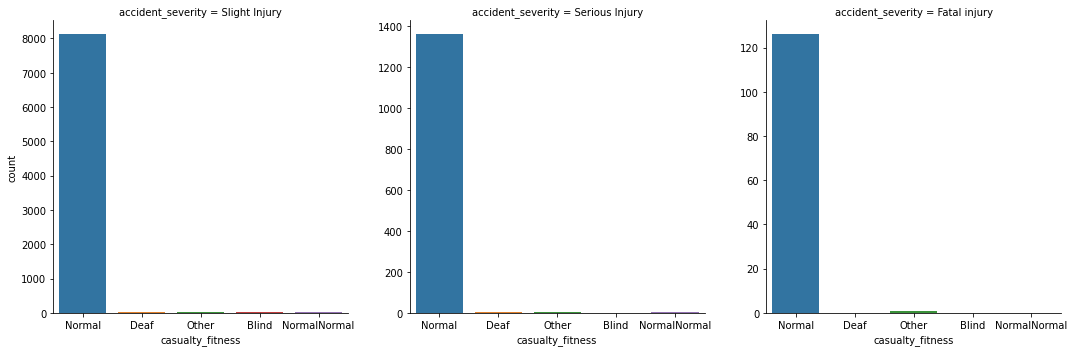

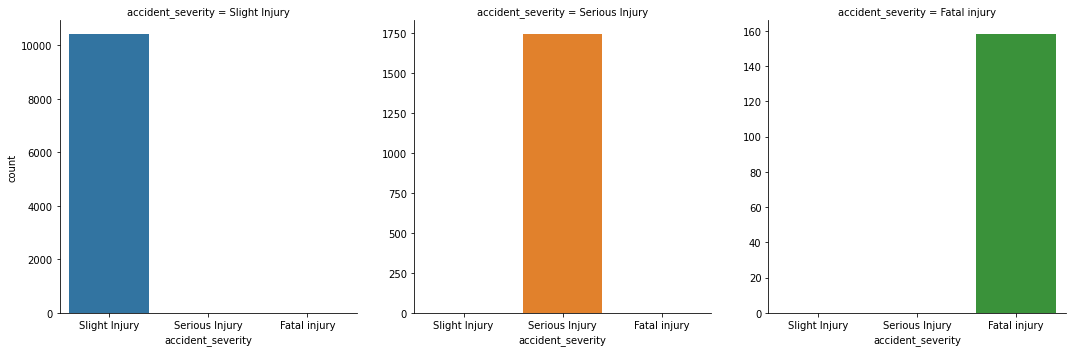

In [27]:
### Relation between Target('Categorical') & Categorical Features by Count plot
for col in rta_data.select_dtypes(include='object'):
  if rta_data[col].nunique() <= 7:
    g = sns.catplot(x=col,col='accident_severity',kind='count',data=rta_data,sharey=False)
    g.set_xticklabels()

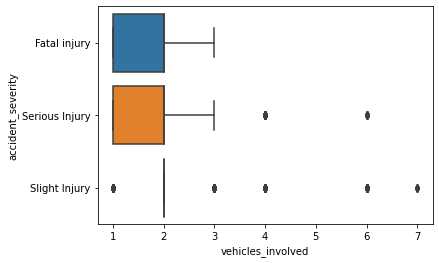

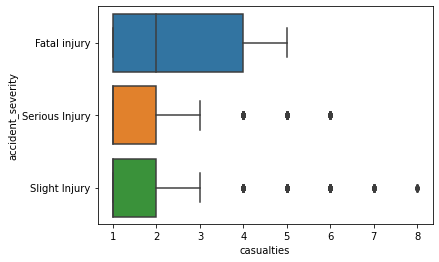

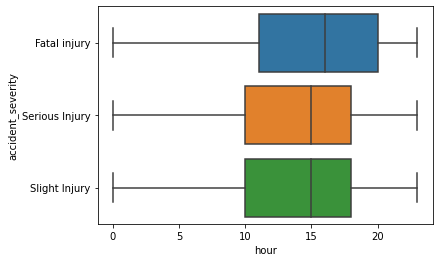

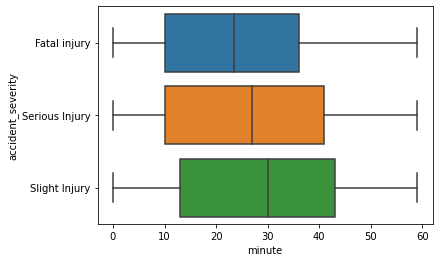

In [28]:
### Relation between Target('Categorical') & Numerical Features by Count plot
for col in rta_data.select_dtypes(include='int'):
  sns.boxplot(x= col,y=rta_data['accident_severity'].astype('category'),data=rta_data)
  plt.show()

In [29]:
num_cols = rta_data.dtypes[rta_data.dtypes == 'int64'].index.to_list()
cat_cols = rta_data.dtypes[rta_data.dtypes != 'int64'].index.to_list()

In [30]:
rta_data[cat_cols]

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


### Preprocessing

In [31]:
rta_data.isna().sum()[rta_data.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [32]:
# dropping columns that can cause imbalance while imputation
rta_data.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [33]:
impute_cols = [x for x in rta_data.isna().sum()[rta_data.isna().sum() != 0].index.to_list()]
for fet in impute_cols:
    rta_data[fet].fillna(rta_data[fet].mode()[0],inplace=True)

In [34]:
rta_data.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

#### Encoding

In [35]:
## Get all colums except target
rta_data.drop(['accident_severity'], axis=1).columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'driving_experience', 'vehicle_type', 'vehicle_owner', 'service_year',
       'accident_area', 'lanes', 'road_allignment', 'junction_type',
       'surface_type', 'road_surface_conditions', 'light_condition',
       'weather_condition', 'collision_type', 'vehicles_involved',
       'casualties', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'pedestrian_movement',
       'accident_cause', 'hour', 'minute'],
      dtype='object')

In [36]:
def ordinal_encoder(rta_data, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(rta_data[feat].nunique()))
        feat_key = list(rta_data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        rta_data[feat] = rta_data[feat].map(feat_dict)
    return rta_data

rta_data = ordinal_encoder(rta_data, rta_data.drop(['accident_severity'], axis=1).columns)
rta_data.shape

(12316, 29)

In [37]:
rta_data.head(10)

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,2,1,2,1,1,1,4,4,10,3,...,3,4,3,6,4,6,10,Slight Injury,18,3
1,2,2,2,5,4,12,4,3,7,5,...,3,4,3,6,4,6,17,Slight Injury,18,3
2,2,1,2,5,1,6,4,6,2,7,...,3,1,2,2,3,6,1,Serious Injury,18,3
3,4,1,2,5,3,12,1,6,7,7,...,3,3,1,1,3,6,2,Slight Injury,2,7
4,4,1,2,5,2,1,4,3,5,7,...,3,4,3,6,4,6,17,Slight Injury,2,7
5,1,2,2,5,3,1,4,6,8,3,...,11,1,2,2,3,6,15,Slight Injury,15,16
6,7,1,2,5,2,1,4,6,10,5,...,4,1,1,1,3,6,14,Slight Injury,18,31
7,1,1,2,5,2,1,1,4,10,7,...,11,4,3,6,4,6,13,Slight Injury,18,21
8,1,1,2,5,4,6,4,1,5,7,...,3,3,2,5,3,1,2,Slight Injury,18,21
9,1,1,2,5,1,1,4,2,10,5,...,11,2,2,1,3,6,10,Serious Injury,18,21


c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


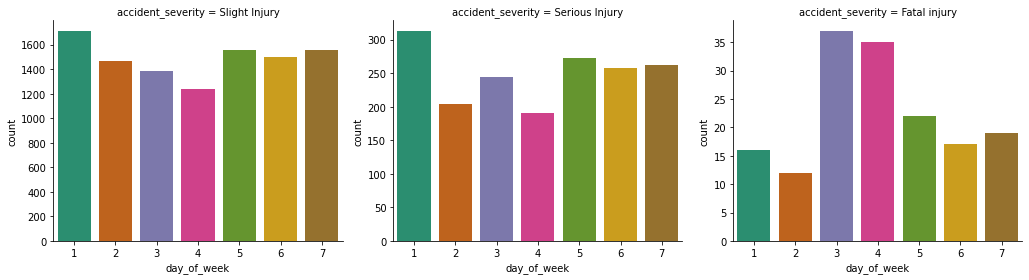

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


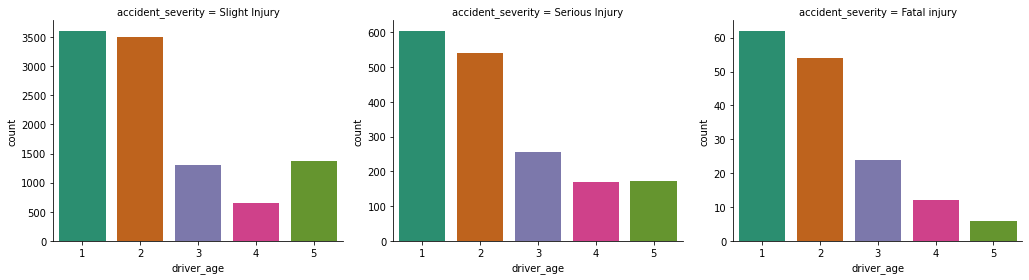

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


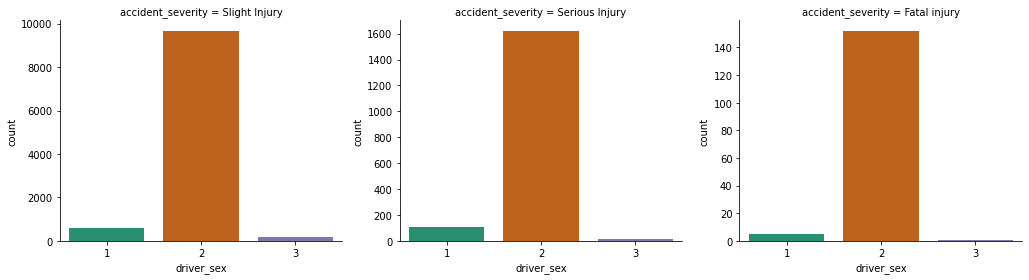

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


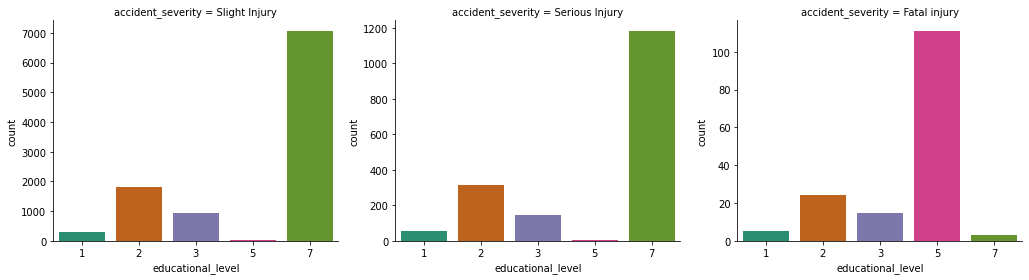

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


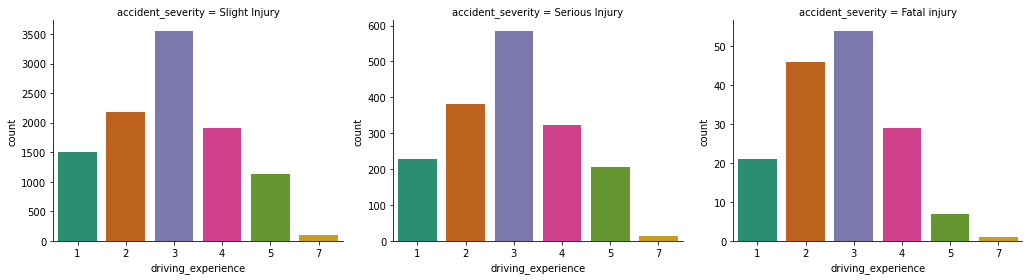

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


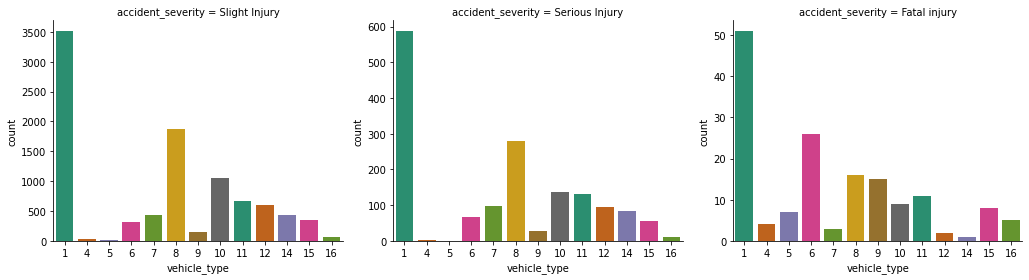

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


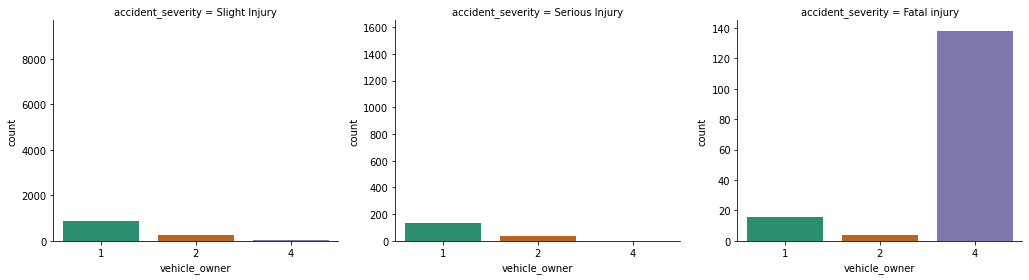

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


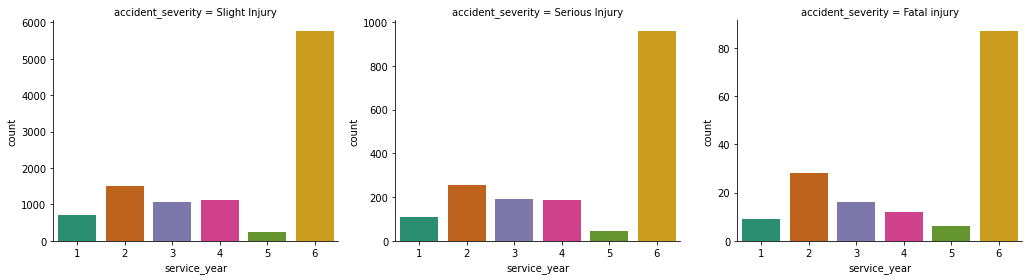

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


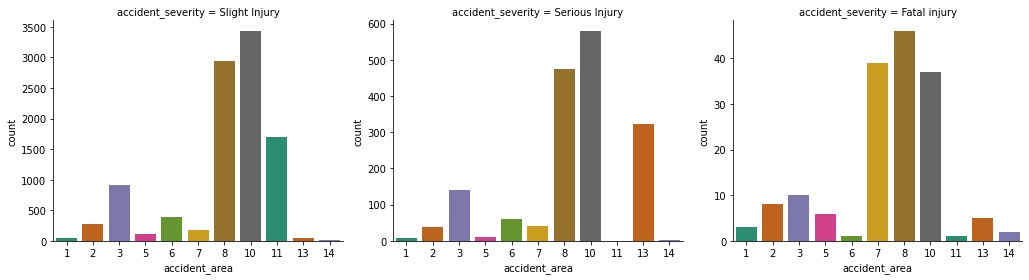

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


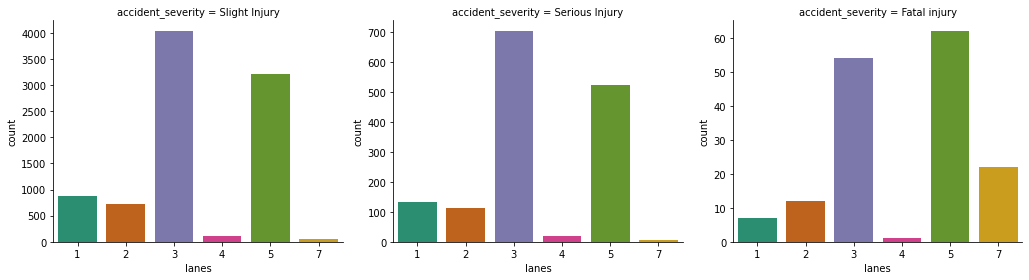

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


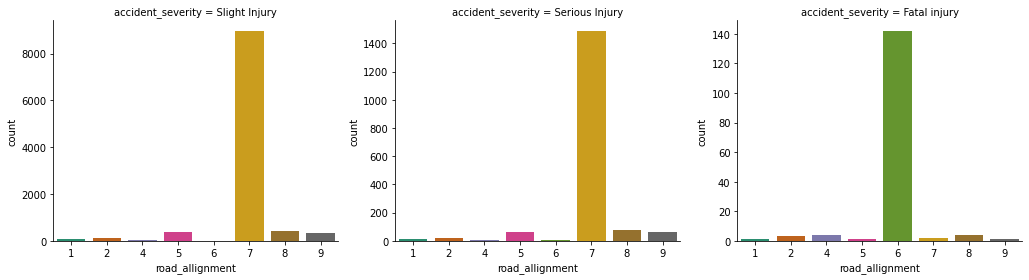

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


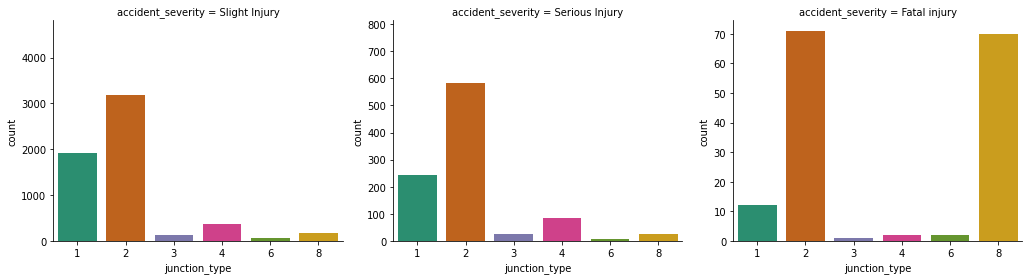

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


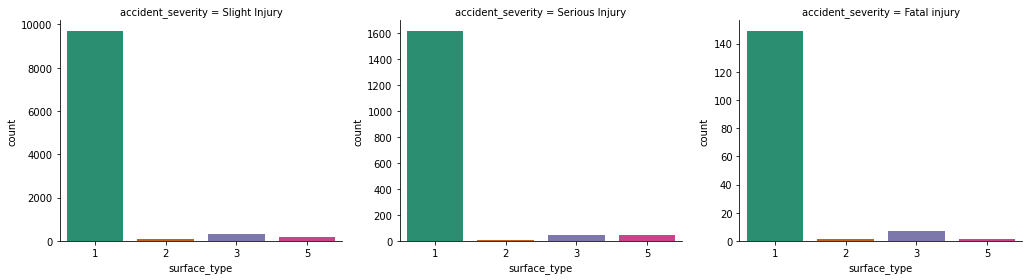

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


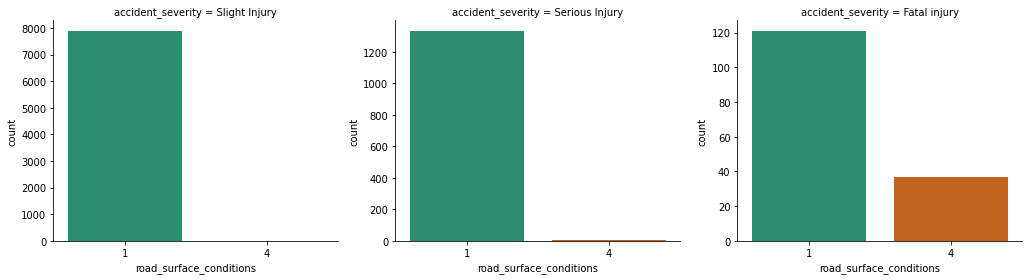

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


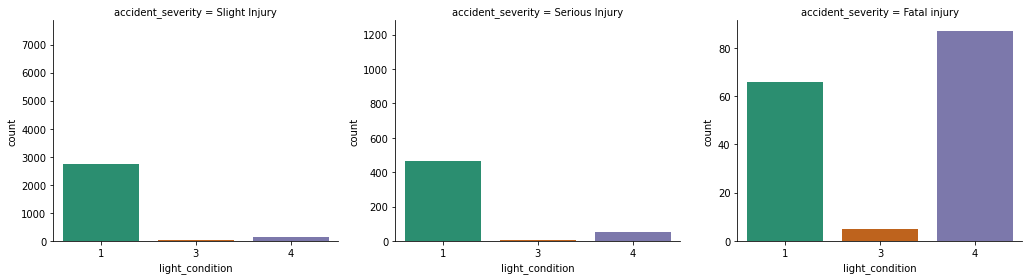

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


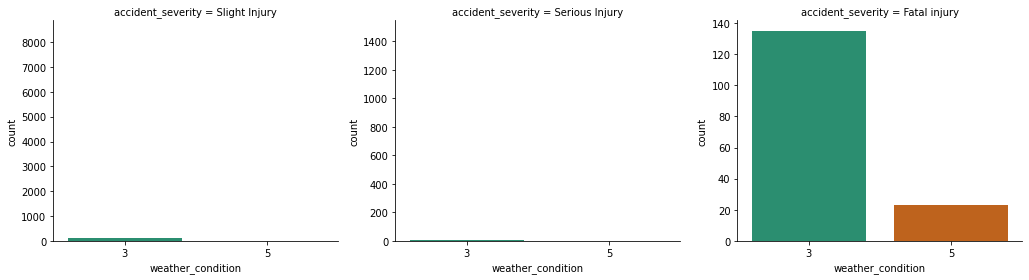

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


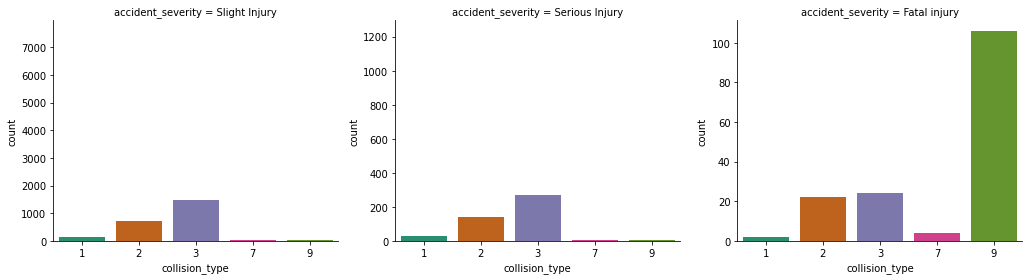

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


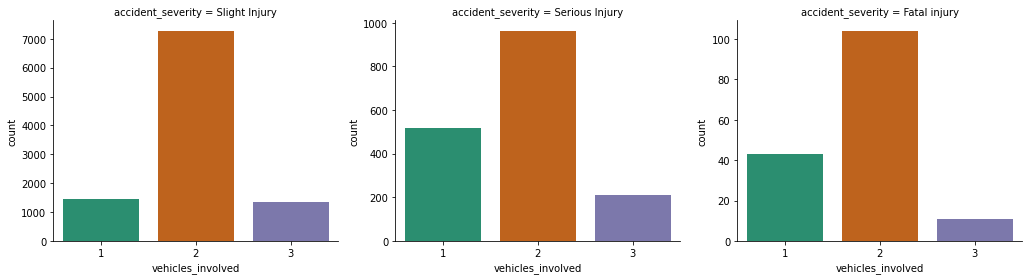

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


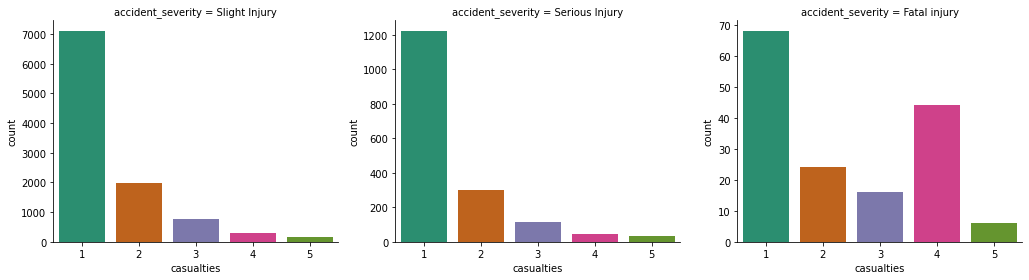

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


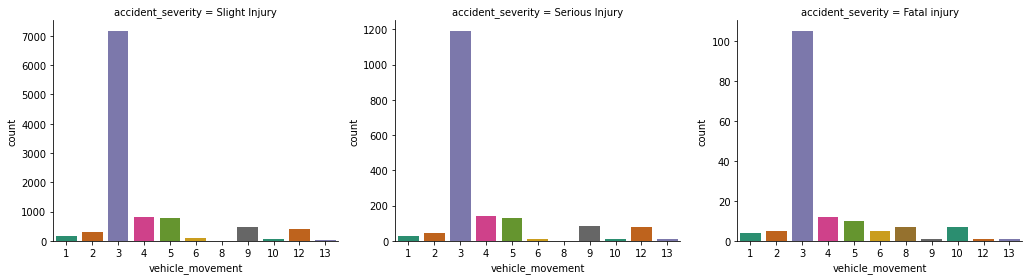

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


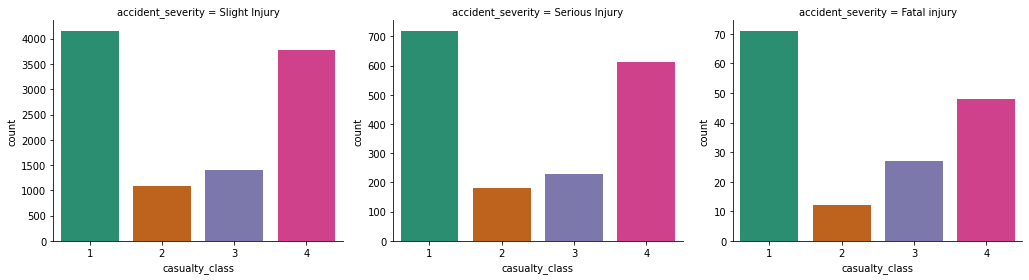

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


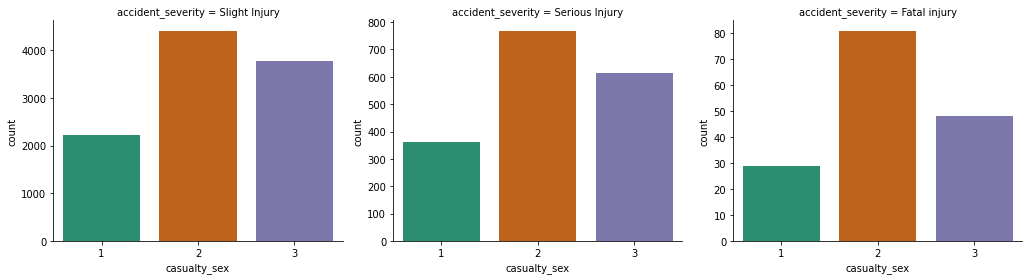

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


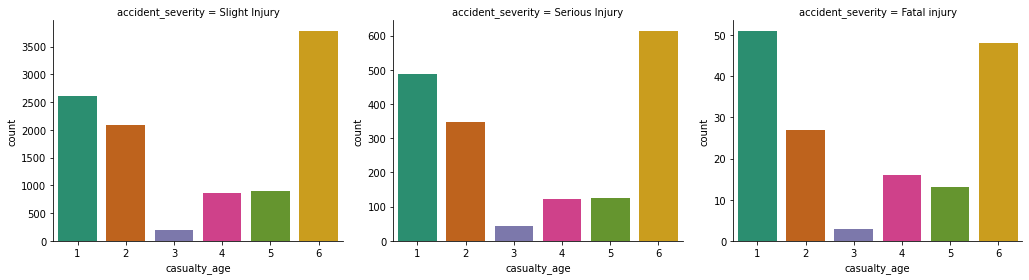

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


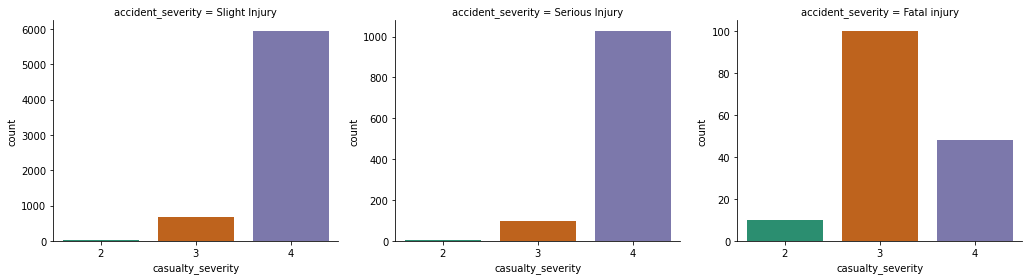

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


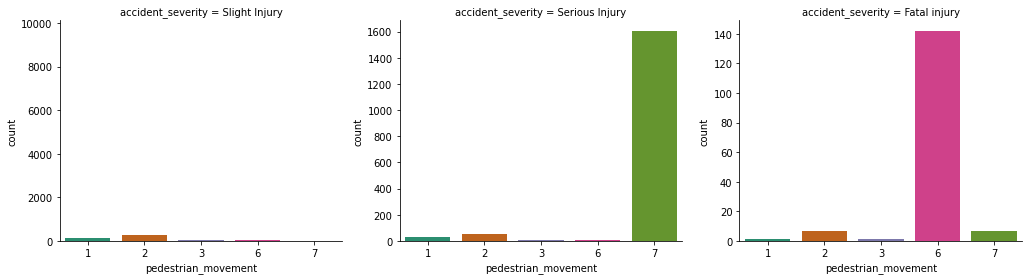

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


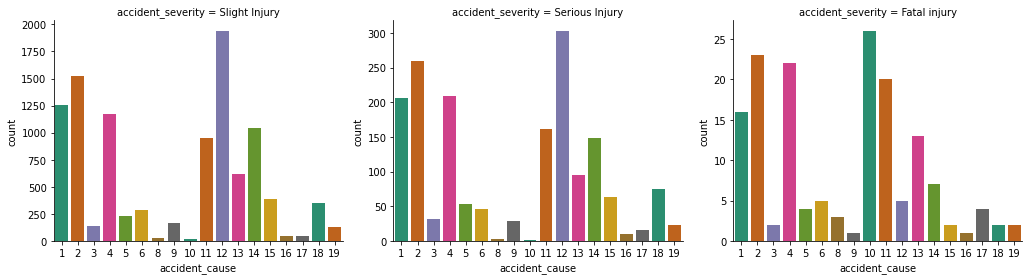

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


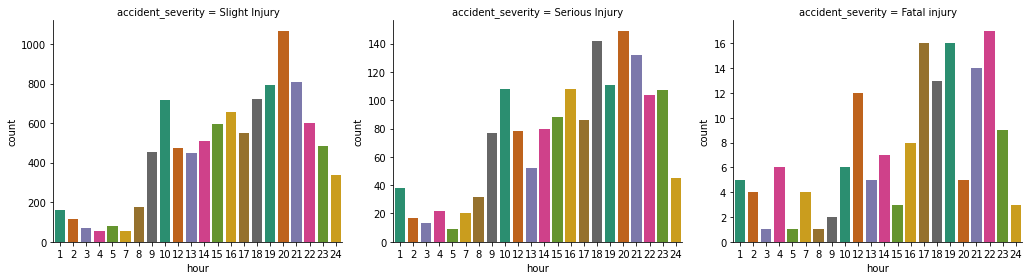

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


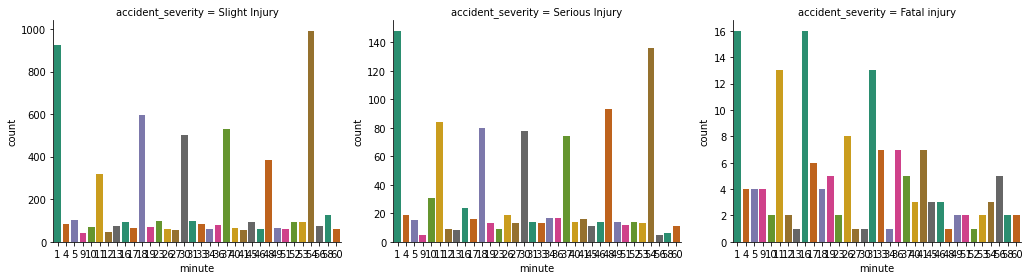

In [38]:
for col in rta_data.drop('accident_severity', axis=1):
    g = sns.FacetGrid(rta_data, col='accident_severity',height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

#### Observations:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

In [39]:
### Use Groupby for group numeric features by categorical features
for col in rta_data.select_dtypes(include='object'):
  if rta_data[col].nunique() <=4:
    display(rta_data.groupby(col)[['vehicles_involved','casualties']].mean())

,vehicles_involved,casualties
accident_severity,,
Fatal injury,1.797468,2.341772
Serious Injury,1.888124,1.535284
Slight Injury,2.065194,1.538262


In [40]:
### Check the Correlation matrix for the various numeric features
corr = rta_data.corr()
corr

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
day_of_week,1.000000,0.019993,0.009986,-0.004517,-0.010062,-0.002417,0.001417,-0.022951,0.003281,-0.009320,...,-0.050042,-0.027643,0.006661,0.001461,-0.003642,0.001512,0.000250,0.010516,-0.009914,-0.009277
driver_age,0.019993,1.000000,-0.351878,0.013613,-0.013407,0.004830,0.005405,0.000220,0.011472,0.008176,...,-0.054474,-0.006562,0.005386,0.011358,0.000043,0.003565,0.000372,-0.000703,0.002069,-0.007233
driver_sex,0.009986,-0.351878,1.000000,0.004967,0.009855,-0.003757,-0.009489,0.010349,-0.000274,-0.012529,...,0.048503,0.007058,0.003335,-0.006046,0.014191,0.002474,0.006981,-0.000598,-0.004134,0.000412
educational_level,-0.004517,0.013613,0.004967,1.000000,0.057625,0.005447,-0.012486,-0.003894,-0.006854,-0.002756,...,0.003698,0.004248,0.005382,0.007483,0.008226,0.004950,0.000177,-0.000451,-0.001659,-0.009783
driving_experience,-0.010062,-0.013407,0.009855,0.057625,1.000000,0.014333,0.000144,-0.005653,-0.000290,-0.010444,...,-0.007118,0.004794,-0.002783,-0.000214,-0.010891,-0.004952,-0.018790,-0.007728,-0.008570,-0.009503
vehicle_type,-0.002417,0.004830,-0.003757,0.005447,0.014333,1.000000,-0.012463,0.003448,-0.007631,-0.020156,...,0.003022,0.010841,-0.006116,-0.011247,-0.008934,-0.001679,0.010500,-0.004200,-0.020264,-0.001948
vehicle_owner,0.001417,0.005405,-0.009489,-0.012486,0.000144,-0.012463,1.000000,0.019384,-0.021942,0.045938,...,-0.004504,0.022287,0.003196,0.007335,0.011667,0.010517,0.023517,0.016550,-0.001988,0.007896
service_year,-0.022951,0.000220,0.010349,-0.003894,-0.005653,0.003448,0.019384,1.000000,-0.016821,-0.061602,...,0.006300,-0.009814,-0.001983,0.003409,-0.002169,0.006072,-0.006498,-0.007146,-0.010464,-0.000763
accident_area,0.003281,0.011472,-0.000274,-0.006854,-0.000290,-0.007631,-0.021942,-0.016821,1.000000,0.022760,...,-0.004690,0.004691,0.011325,0.010546,0.008001,0.014565,0.000949,-0.009589,0.001215,0.000814
lanes,-0.009320,0.008176,-0.012529,-0.002756,-0.010444,-0.020156,0.045938,-0.061602,0.022760,1.000000,...,0.002188,-0.002089,0.006034,0.000516,0.006677,0.006183,0.005848,0.016384,0.004176,-0.008028


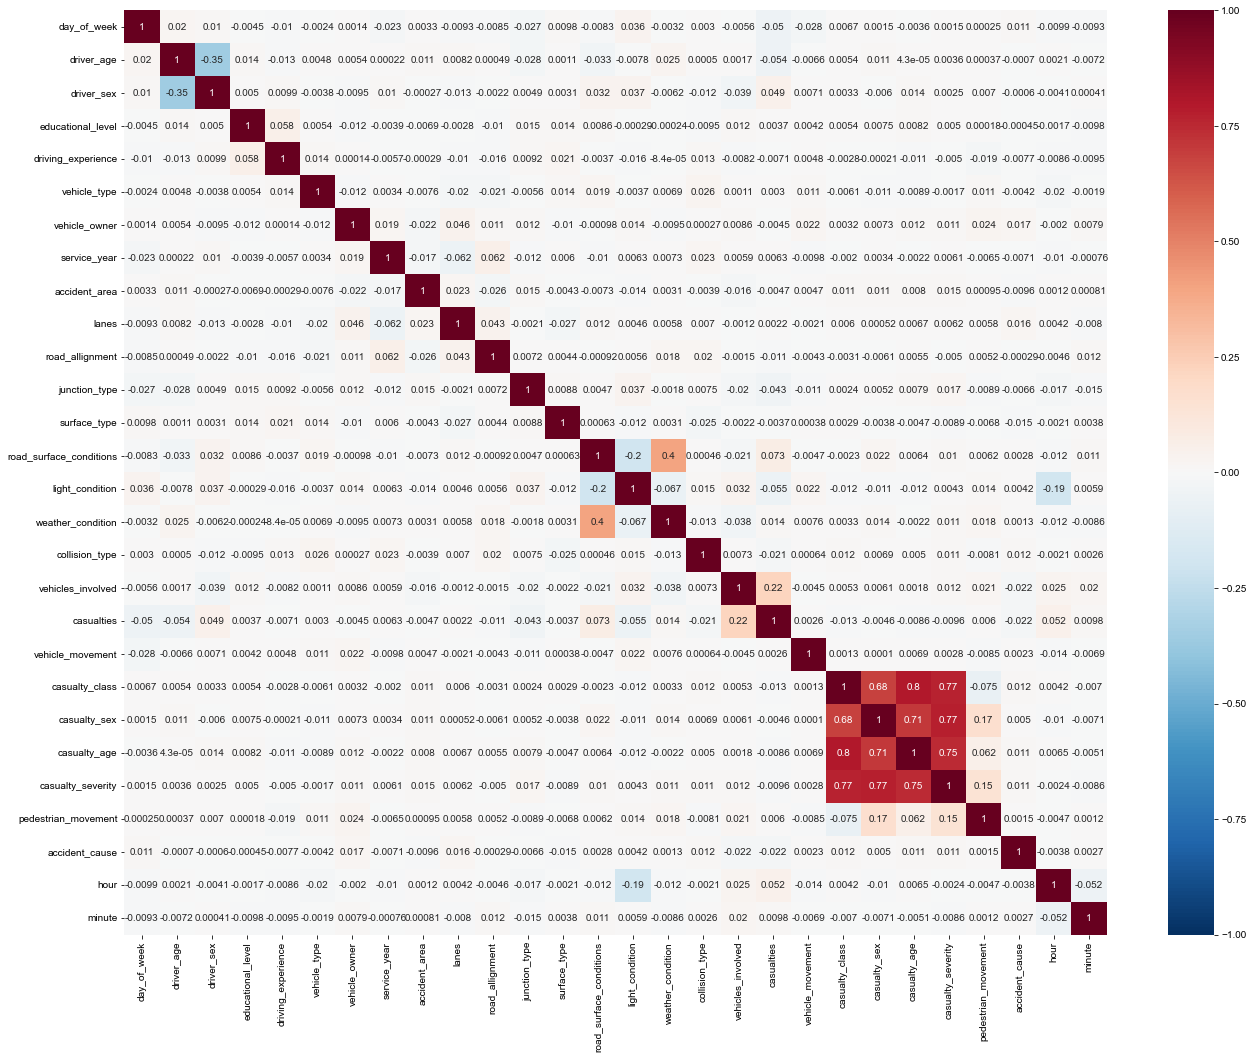

In [41]:
### Check the Heat map of the correlations
plt.figure(figsize=(22,17))
sns.heatmap(corr,vmax=1,vmin=-1,annot=True,cmap='RdBu_r')
sns.set(font_scale=0.8)
plt.show()

#### Upsampling

In [42]:
X = rta_data.drop(['accident_severity'], axis=1)
y = rta_data['accident_severity']

from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=2)
print(rta_data.shape)
print(X.shape,y.shape)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)



(12316, 29)
(12316, 28) (12316,)
(8251, 28) (4065, 28) (8251,) (4065,)


In [43]:
# # upsampling using smote
# # %pip install imblearn
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# counter = Counter(y_train)

# print("=============================")

# for k,v in counter.items():
#     per = 100*v/len(y_train)
#     print(f"Class= {k}, n={v} ({per:.2f}%)")

# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

# counter = Counter(y_train)

# print("=============================")

# for k,v in counter.items():
#     per = 100*v/len(y_train)
#     print(f"Class= {k}, n={v} ({per:.2f}%)")

# print("=============================")

# print("Upsampled data shape: ", X_train.shape, y_train.shape)

In [44]:
y_train

9072     Slight Injury
8597     Slight Injury
10383    Slight Injury
2234     Slight Injury
4751     Slight Injury
             ...      
2514     Slight Injury
11798    Slight Injury
6637     Slight Injury
2575     Slight Injury
7336     Slight Injury
Name: accident_severity, Length: 8251, dtype: object

In [45]:
y_test

5848      Slight Injury
9469     Serious Injury
8265      Slight Injury
8098      Slight Injury
9346      Slight Injury
              ...      
10380     Slight Injury
9336      Slight Injury
4761      Slight Injury
857       Slight Injury
7593     Serious Injury
Name: accident_severity, Length: 4065, dtype: object

In [46]:
### Label Encoding Custom
def label_encoder(rta_data, feats): 
    for feat in feats:    
        feat_val = list(np.arange(rta_data[feat].nunique()))
        feat_key = list(rta_data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        rta_data[feat] = rta_data[feat].map(feat_dict)
    return rta_data

In [47]:
y_test = label_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = label_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

In [48]:
y_test,y_train

(5848     2
 9469     1
 8265     2
 8098     2
 9346     2
         ..
 10380    2
 9336     2
 4761     2
 857      2
 7593     1
 Name: accident_severity, Length: 4065, dtype: int32,
 9072     2
 8597     2
 10383    2
 2234     2
 4751     2
         ..
 2514     2
 11798    2
 6637     2
 2575     2
 7336     2
 Name: accident_severity, Length: 8251, dtype: int32)

In [49]:
X_train.head(20)

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
9072,3,2,2,2,3,6,4,6,8,5,...,1,5,4,3,6,4,6,13,10,59
8597,7,2,2,3,1,8,4,6,7,5,...,1,4,1,2,1,3,6,1,18,21
10383,3,1,2,5,3,15,4,3,7,3,...,2,4,4,3,6,4,6,4,18,56
2234,5,1,2,5,2,12,4,3,8,5,...,1,3,4,3,6,4,6,11,9,22
4751,1,4,2,5,6,1,4,3,3,3,...,1,3,4,3,6,4,6,17,20,12
6573,5,1,2,5,3,9,4,3,7,5,...,4,3,3,2,4,2,2,4,18,20
1221,5,1,2,5,2,6,4,3,8,5,...,3,8,1,2,2,3,6,18,18,31
9449,7,1,2,5,3,11,4,6,8,3,...,2,3,4,3,6,4,6,4,14,25
5304,4,2,2,5,5,1,4,6,8,1,...,2,4,1,2,4,3,6,11,20,1
1402,6,2,2,2,3,1,4,6,2,2,...,2,12,3,1,2,3,7,1,23,11


In [70]:
X_train.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'driving_experience', 'vehicle_type', 'vehicle_owner', 'service_year',
       'accident_area', 'lanes', 'road_allignment', 'junction_type',
       'surface_type', 'road_surface_conditions', 'light_condition',
       'weather_condition', 'collision_type', 'vehicles_involved',
       'casualties', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'pedestrian_movement',
       'accident_cause', 'hour', 'minute'],
      dtype='object')

### Baseline Modeling

In [50]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [51]:
models = [] 
scores ={}

In [52]:
# X_train._get_numeric_data().head()

In [53]:
# np.ravel(y_train, order='C')

In [54]:
## GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
scores['gb']  = [accuracy_score(y_test,y_pred)]
models.append(gb)

In [55]:
## ExtraTreesClassifier  Algo for Model Classification
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
scores['et'] = [accuracy_score(y_test, y_pred)]
models.append(et)

In [56]:
## Random forest Algo for Model Classification
rt = RandomForestClassifier()
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
scores['rt'] = [accuracy_score(y_test,y_pred)]
models.append(rt)

In [57]:
## XGBoost Algo for Model Classification
xgb = XGBClassifier()
xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
y_pred = xgb.predict(X_test._get_numeric_data())
scores['xgb']= [accuracy_score(y_test, y_pred)]
models.append(xgb)

In [58]:
## DecisionTree Algo for Model Classification
dt = DecisionTreeClassifier()
dt.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
y_pred = dt.predict(X_test._get_numeric_data())
scores['dt']= [accuracy_score(y_test, y_pred)]
models.append(dt)

In [59]:
models

[GradientBoostingClassifier(),
 ExtraTreesClassifier(),
 RandomForestClassifier(),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
               predictor='auto', random_state=0, reg_alpha=0, ...),
 DecisionTreeClassifier()]

In [60]:
scores

{'gb': [0.8460024600246002],
 'et': [0.847970479704797],
 'rt': [0.8469864698646986],
 'xgb': [0.8519065190651907],
 'dt': [0.7589175891758918]}

### Performance Matrix

In [61]:
def Evaluation(model,X_train,X_test,y_train,y_test,hypertuning=False):

  plt.figure(  figsize=(12,6) )
  print( "-----------------------------------------------------------------------------------------------------------")
  print( model )
  print( " For Train Set :  ")
  y_pred = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_train)

  if hypertuning==True:
    print("Param for GS", model.best_params_)
    print("CV score for GS", model.best_score_)

  accuracy_train = accuracy_score( y_train, y_pred )
  precision_train = precision_score( y_train, y_pred, average='weighted' )
  recall_train = recall_score(y_train, y_pred, average='weighted')
  F1_score_train = f1_score(y_train, y_pred, average='weighted')
  print("F1_Score = ", F1_score_train )
  print( classification_report( y_train, y_pred ) )

  print( " For Test Set :  ")
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  accuracy_test = accuracy_score( y_test, y_pred )
  precision_test = precision_score( y_test, y_pred, average='weighted' )
  recall_test = recall_score(y_test, y_pred, average='weighted')
  F1_score_test = f1_score(y_test, y_pred, average='weighted')
  print("F1_Score = ", F1_score_test )
  print( classification_report( y_test, y_pred ) )

  print('------------------------------------------------------------------------------------------------------------')
  print("\n")

  # fpr, tpr, thresh = roc_curve( y_test, y_pred )
  # plt.plot( fpr, tpr, label=model + str( auc_score ) ) 
  return  accuracy_train, precision_train, recall_train, F1_score_train, accuracy_test, precision_test, recall_test, F1_score_test



In [62]:
def apply_models_with_default_paramters(X_train,X_test,y_train,y_test):
  models_default = [ RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(),
                     ExtraTreesClassifier(), DecisionTreeClassifier()
                     ]

  
  F1_Score_train = []
  Accuracy_train = []
  Recall_train = []
  Precision_train = []


  F1_Score_test = []
  Accuracy_test = []
  Recall_test = []
  Precision_test = []

  Model_Name = []

  for model in models_default:
    print(model)
    Model_Name.append( model )
    model.fit(X_train, y_train)

    accuracy_train, precision_train, recall_train, F1_score_train, accuracy_test, precision_test, recall_test, F1_score_test = Evaluation(model,X_train,X_test,y_train,y_test,False)
    
    F1_Score_train.append( F1_score_train )
    Accuracy_train.append( accuracy_train )
    Recall_train.append( recall_train )
    Precision_train.append( precision_train )

    F1_Score_test.append( F1_score_test )
    Accuracy_test.append( accuracy_test )
    Recall_test.append( recall_test )
    Precision_test.append( precision_test )
    
  results = pd.DataFrame()
  results['Model_Name'] = Model_Name

  train_test_f1_score_difference = np.subtract(F1_Score_train,F1_Score_test)  # To Check Overfitting/Underfitting

  results['F1_Score on Test Set'] = F1_Score_test
  results['Accuracy on Test Set'] = Accuracy_test
  results['Recall on Test Set'] = Recall_test
  results['Precision on Test Set'] = Precision_test

  results['F1_Score on Train Set'] = F1_Score_train
  results['Accuracy on Train Set'] = Accuracy_train
  results['Recall on Train Set'] = Recall_train
  results['Precision on Train Set'] = Precision_train

  results['Difference of F1_Score on train and test'] = train_test_f1_score_difference

  results = results.sort_values(by=['F1_Score on Test Set','Difference of F1_Score on train and test'],ascending = [False, True]) 

  return results

In [63]:
results = apply_models_with_default_paramters(X_train,X_test,y_train,y_test)

RandomForestClassifier()
-----------------------------------------------------------------------------------------------------------
RandomForestClassifier()
 For Train Set :  
F1_Score =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00      6987

    accuracy                           1.00      8251
   macro avg       1.00      1.00      1.00      8251
weighted avg       1.00      1.00      1.00      8251

 For Test Set :  
F1_Score =  0.7816461652012369
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.86      0.03      0.06       585
           2       0.85      1.00      0.92      3428

    accuracy                           0.85      4065
   macro avg       0.57      0.34      0.33      4065
weighted avg       0.84      0.85      0.78      40

c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

-----------------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
 For Train Set :  
F1_Score =  0.8016859020404961
              precision    recall  f1-score   support

           0       0.96      0.25      0.39       106
           1       0.99      0.06      0.11      1158
           2       0.86      1.00      0.92      6987

    accuracy                           0.86      8251
   macro avg       0.93      0.43      0.47      8251
weighted avg       0.88      0.86      0.80      8251

 For Test Set :  
F1_Score =  0.7834351904244177
              precision    recall  f1-score   support

           0       0.60      0.12      0.19        52
           1       0.67      0.03      0.06       585
           2       0.85      1.00      0.92      3428

    accuracy                           0.85      4065
   macro avg       0.70      0.38      0.39      4065
weighted avg       0.82      0.85      0.78      4065

--

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [64]:
results

,Model_Name,F1_Score on Test Set,Accuracy on Test Set,Recall on Test Set,Precision on Test Set,F1_Score on Train Set,Accuracy on Train Set,Recall on Train Set,Precision on Train Set,Difference of F1_Score on train and test
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.809596,0.851907,0.851907,0.823785,0.959795,0.962308,0.962308,0.963914,0.150199
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.783435,0.846002,0.846002,0.818576,0.801686,0.857957,0.857957,0.875984,0.018251
3,"(ExtraTreeClassifier(random_state=1488295758),...",0.782074,0.847724,0.847724,0.871015,1.000000,1.000000,1.000000,1.000000,0.217926
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.781646,0.846986,0.846986,0.837569,1.000000,1.000000,1.000000,1.000000,0.218354
4,DecisionTreeClassifier(),0.769259,0.761132,0.761132,0.778476,1.000000,1.000000,1.000000,1.000000,0.230741


### Hypertuning Models

#### By use of Optuna

In [65]:
%pip install optuna
import optuna


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
def xgboost_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 200)
    _max_depth = trial.suggest_int("max_depth", 2, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 5, 50)

    xgb = XGBClassifier( max_depth=_max_depth,
                                min_samples_split=_min_samp_split,
                                min_samples_leaf=_min_samples_leaf,
                                max_features=_max_features,
                                n_estimators=_n_estimators,
                                random_state=10
                              )
    scores = cross_val_score( xgb, X_train, y_train, cv=3, scoring="f1_weighted"  )
    return scores.mean()

In [67]:

model = XGBClassifier( n_estimators=93, max_depth=8, min_samples_split=5, min_samples_leaf=2, max_features=49, random_state=10 )
model.fit( X_train, y_train )
Evaluation(model,X_train,X_test,y_train,y_test,hypertuning=False)

[21:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


-----------------------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       

(0.997939643679554,
 0.9979446445444092,
 0.997939643679554,
 0.997933277742518,
 0.8548585485854858,
 0.8306703584929361,
 0.8548585485854858,
 0.8127399720947799)

<Figure size 864x432 with 0 Axes>

In [68]:
X_train.to_csv('X_train_preprocessed.csv', encoding = 'utf-8-sig', index=False) 
X_test.to_csv('X_test_preprocessed.csv', encoding = 'utf-8-sig', index=False)
y_train.to_csv('y_train_preprocessed.csv', encoding = 'utf-8-sig', index=False) 
y_test.to_csv('y_test_preprocessed.csv', encoding = 'utf-8-sig', index=False) 

### Saving the model

In [69]:
import pickle
with open('Models/model_XGB.pkl', 'wb') as files:
  pickle.dump(model, files)